<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/MachineLearning/blob/main/Unidad2/2_Regresion_Lineal_Multiple_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 2

### Practica 2: **Regresión Lineal Múltiple**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________

## 1. Cargar datos y librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv("autos2.csv")

# Mostrar las primeras filas
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


## **2. Definir variables predictoras y variable objetivo**

In [2]:
X = df[['horsepower', 'engine-size', 'city-mpg', 'wheel-base', 'bore']]
y = df['price']


## **3. Dividir en conjunto de entrenamiento y prueba**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **4. Entrenar modelo de regresión lineal múltiple**

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## **5. Evaluar el modelo**

In [5]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


Error cuadrático medio (MSE): 31610677.23
Coeficiente de determinación (R²): 0.74


In [6]:
# Calcular el RMSE (más fácil de interpretar que el MSE)
rmse = np.sqrt(mse)
print(f"Raíz del Error cuadrático medio (RMSE): {rmse:.2f}")


Raíz del Error cuadrático medio (RMSE): 5622.34


## **6. Coeficientes del modelo**

In [7]:
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})

print(coef_df)
print(f"Intersección (bias): {model.intercept_:.2f}")


      Variable  Coeficiente
0   horsepower    47.316135
1  engine-size    85.738718
2     city-mpg   -94.052553
3   wheel-base   263.370535
4         bore -1099.578480
Intersección (bias): -22914.90


### **Interpretación**

#### **1. RMSE ≈ $5,622**

* El error promedio en las predicciones es de 5,622, lo cual es alto, especialmente considerando que muchos de los autos en el dataset tienen precios entre 8,000 y 16,000.

* En esos casos, este error puede representar entre un 34% y un 72% del valor real, lo que lo hace poco confiable para estimaciones exactas.

#### **2. R² = 0.74**

* El modelo solo explica el 74% de la variación en los precios, dejando un 26% sin explicar.
* Esto sugiere que la relación entre las variables independientes y el precio no es completamente lineal, y que la regresión lineal no captura bien las complejidades del problema.

## **7. Comparar precios reales vs. predichos**

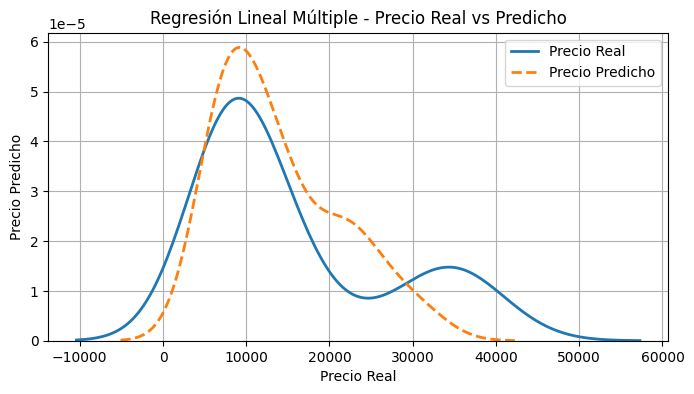

In [10]:
#plt.scatter(y_test, y_pred)
plt.figure(figsize=(8, 4))
sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred, label='Precio Predicho', linewidth=2, linestyle='--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Regresión Lineal Múltiple - Precio Real vs Predicho")
plt.grid(True)
plt.legend()
plt.show()
